<a href="https://colab.research.google.com/github/VadimUrupa1399/ML-with-Python/blob/master/Orthogonal_Matching_Pursuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

In [3]:
n_components, n_features = 512, 100
n_nonzero_coefs = 17

In [5]:
y, X, w = make_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0)
idx, = w.nonzero()

In [6]:
y_noisy = y +0.05 * np.random.rand(len(y))

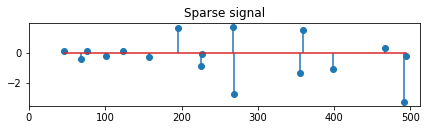

In [8]:
plt.figure(figsize=(7,7))
plt.subplot(4,1,1)
plt.xlim(0, 512)
plt.title('Sparse signal')
plt.stem(idx, w[idx], use_line_collection=True)
plt.show()

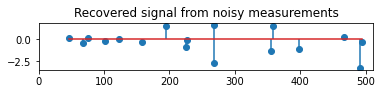

In [12]:
#plot the noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
idx_r, =coef.nonzero()
plt.subplot(4,1,3)
plt.xlim(0,512)
plt.title('Recovered signal from noisy measurements')
plt.stem(idx_r, coef[idx_r], use_line_collection=True)
plt.show()


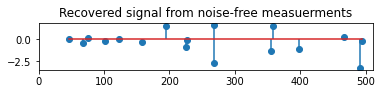

In [10]:
#plot noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X,y)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4,1,2)
plt.xlim(0, 512)
plt.title('Recovered signal from noise-free measuerments')
plt.stem(idx_r, coef[idx_r], use_line_collection=True)
plt.show()

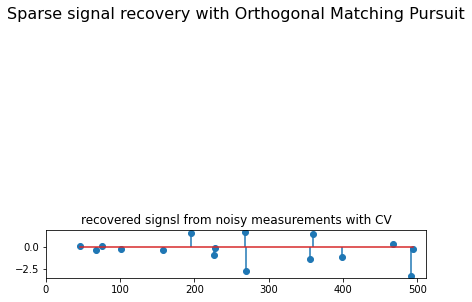

In [18]:
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r, = coef.nonzero()
plt.subplot(4,1,4)
plt.xlim(0, 512)
plt.title("recovered signsl from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)
plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse signal recovery with Orthogonal Matching Pursuit', fontsize=16)
plt.show()